### Plotly and Cufflinks

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

In [3]:
import cufflinks as cf

### Using Cufflinks and iplot

- line
- scatter
- bar
- box
- spread
- ratio
- heatmap
- surface
- histogram
- bubble

In [4]:
print(py.__version__)

4.8.1


In [5]:
py.offline.init_notebook_mode(connected=True)

In [6]:
cf.go_offline()

In [7]:
df = pd.DataFrame(data=np.random.randn(100,3), columns=['A','B','C'])
df.head()

,A,B,C
0,-0.476774,1.343604,-0.616717
1,-1.881335,-0.294969,-1.048038
2,0.737239,-0.663603,-0.987605
3,-0.244848,0.817957,0.547591
4,0.304607,-0.480297,2.586163


In [8]:
df['A'] = df['A'].cumsum() + 20
df['B'] = df['B'].cumsum() + 20
df['C'] = df['C'].cumsum() + 20

In [9]:
df.head()

,A,B,C
0,19.523226,21.343604,19.383283
1,17.641891,21.048634,18.335246
2,18.379130,20.385031,17.347640
3,18.134282,21.202988,17.895232
4,18.438889,20.722692,20.481395


In [32]:
df.iplot(theme='solar')

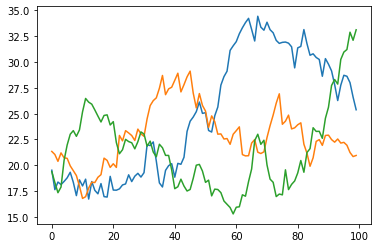

In [20]:
plt.plot(df)

In [28]:
df.iplot(x = 'A', y = 'B', mode = 'markers', size = 25, theme='solar')

In [12]:
import pandas as pd
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")
us_cities.head()

,City,State,Population,lat,lon
0,Marysville,Washington,63269,48.051764,-122.177082
1,Perris,California,72326,33.782519,-117.228648
2,Cleveland,Ohio,390113,41.499320,-81.694361
3,Worcester,Massachusetts,182544,42.262593,-71.802293
4,Columbia,South Carolina,133358,34.000710,-81.034814


In [11]:
import plotly.express as px

In [16]:
fig = px.scatter_mapbox(us_cities, lat="lat", lon="lon", hover_name="City", hover_data=["State", "Population"],
                        color_discrete_sequence=["fuchsia"], zoom=4, height=400)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [24]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [27]:
titanic.iplot(kind='bar', x='sex', y='survived',xTitle='Sex',yTitle='#Survived',title='Survived' , theme='solar')

In [39]:
titanic.groupby(['sex','survived']).sex.count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: sex, dtype: int64

In [40]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [41]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [57]:
cf.set_config_file('pearl')
df.iplot(kind = 'bar', barmode='stack', bargap=0.5, theme='solar')

In [58]:
df.iplot(kind = 'barh', barmode='stack', bargap=0.5, theme='solar')

In [51]:
df.iplot(kind='box', theme='solar')

In [52]:
df.iplot(kind='area', theme='solar')

In [53]:
df1 = pd.DataFrame({'X':[10,20,30,20,10], 'Y':[10,20,30,20,10],'Z':[10,20,30,20,10]})
df1

,X,Y,Z
0,10,10,10
1,20,20,20
2,30,30,30
3,20,20,20
4,10,10,10


In [55]:
df1.iplot(kind='surface', colorscale='rdylbu', theme='solar')

In [56]:
help(cf.datagen)

Help on module cufflinks.datagen in cufflinks:

NAME
    cufflinks.datagen

FUNCTIONS
    bars(n=3, n_categories=3, prefix='category', columns=None, mode='abc')
        Returns a DataFrame with the required format for 
        a bar plot
        
        Parameters:
        -----------
                n : int
                        Number of points for each trace
                n_categories : int
                        Number of categories for each point
                prefix : string
                        Name for each category
                columns : [str]
                        List of column names
                mode : string
                        Format for each item
                                'abc' for alphabet columns
                                'stocks' for random stock names
    
    box(n_traces=5, n=100, mode=None)
        Returns a DataFrame with the required format for 
        a box plot
        
        Parameters:
        -----------
               

In [60]:
cf.datagen.sinwave(10, 0.5).iplot(kind = 'surface', theme='solar')

In [61]:
cf.datagen.scatter3d(2, 150, mode = 'stocks').iplot(kind = 'scatter3d', x = 'x', y= 'y', z = 'z', theme='solar')

In [62]:
df[['A', 'B']].iplot(kind = 'spread', theme='solar')

C:\Users\Sumit\anaconda3\lib\site-packages\cufflinks\plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\Sumit\anaconda3\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [63]:
df.iplot(kind='hist', bins = 25, barmode = 'overlay', bargap=0.5)

In [64]:
cf.datagen.bubble3d(5,4,mode='stocks').iplot(kind='bubble3d',x='x',y='y',z='z', size='size',theme='solar')

In [65]:
cf.datagen.heatmap(20,20).iplot(kind = 'heatmap', colorscale='spectral', title='Cufflinks - Heatmap', theme='solar')

In [66]:
a = cf.datagen.heatmap(20,20)
a

,y_0,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_10,y_11,y_12,y_13,y_14,y_15,y_16,y_17,y_18,y_19
x_0,72.000000,71.820094,81.961018,71.830426,70.029898,68.337891,79.038867,78.077091,78.203744,77.265062,85.729854,91.421717,101.173608,103.650991,102.901203,101.143865,106.864516,103.100425,104.786025,102.544067
x_1,74.980004,75.618534,78.605089,76.034825,73.033434,70.405886,69.608985,73.168399,73.498908,81.175522,81.640646,86.470957,85.296899,85.547058,89.479832,93.305720,95.656315,96.301734,96.477745,98.260394
x_2,72.720356,71.917569,70.258240,72.874201,71.090215,73.582643,71.856291,75.157863,76.026509,72.009412,74.144764,81.617446,79.225839,83.440989,82.733969,86.191101,79.302033,77.869044,79.492228,84.306585
x_3,70.905890,66.211969,66.436127,63.434280,63.688565,63.764740,60.356653,57.450061,59.725090,66.703766,76.291762,72.265830,70.725243,70.084448,50.276453,49.484266,50.033693,56.561102,62.272236,60.589546
x_4,63.183564,62.308789,46.200613,43.839045,49.496389,45.139544,44.182278,54.055975,59.337475,71.981388,64.760640,62.675136,65.870792,56.789487,56.721692,59.785280,60.893149,67.448088,68.157955,67.781703
x_5,75.576433,76.613869,66.150030,71.021453,70.190849,69.419917,64.486105,64.644249,61.309220,50.321785,49.011640,54.136031,56.749753,58.002704,52.432163,52.686946,59.369400,55.335457,56.486724,57.135592
x_6,72.802969,66.693024,73.387038,73.559960,79.234887,75.965435,78.361986,78.991027,76.025468,78.376016,74.694798,72.426048,69.067850,70.637835,71.708282,60.824177,55.587456,53.110800,51.199743,52.723059
x_7,79.557105,76.697247,75.951440,76.477015,67.020001,59.233833,62.192904,57.472970,66.301929,72.237399,72.866077,72.478046,73.042959,73.550939,81.822490,84.152514,85.135643,86.600965,100.628985,97.430367
x_8,70.945525,70.382193,75.700372,80.610060,71.400246,71.413924,66.825028,66.723161,70.433817,70.620547,90.919263,85.521857,89.092724,90.087625,83.398955,81.605435,88.619995,80.317967,85.198838,87.950005
x_9,72.536831,68.940757,72.996717,78.313110,71.863570,76.951515,78.869238,77.034205,75.366244,74.514730,62.810039,57.659815,55.392223,49.320717,48.137344,53.540768,50.038844,54.321318,49.618206,49.530200


In [67]:
a.iplot(kind = 'heatmap', colorscale='spectral', title='Cufflinks - Heatmap', theme='solar')